# '''Project work for Workforce Analytics, wherein we need to work on the available features to figure out a solution on the attrition and forecast the problem in order to help stabilise the attrition rate and sturdy the features to help the businiess flow be proper'''

# We will see step by step procedure for the project including, data cleaning, EDA, Visualization, Survival Analysis and Prediction using various models.

In [1]:
'''We start by importing the data and having a look at the various features gathered for the problem'''

# Importing the libraires
import pandas as pd
import numpy as np
attrition = pd.read_csv("../input/hr-attrition-dataset/Final dataset Attrition.csv")

In [2]:
# Since the dataset is loaded we check a few details like
attrition.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,Yes,Travel_Rarely,Research & Development,2,Male,2,1,Laboratory Technician,3,...,21-01-2021,NaN,Salary,OFFICE,4,2,No,Job Event,Contract,NaN
1,21,No,Travel_Rarely,Research & Development,15,Male,3,1,Research Scientist,4,...,13-03-2021,NaN,Work Accident,WFH,5,2,No,Recruiter,Part Time,NaN
2,45,No,Travel_Rarely,Research & Development,6,Male,3,3,Research Director,1,...,23-01-2021,NaN,Dept.Head,WFH,1,3,No,Job Event,Contract,NaN
3,23,No,Travel_Rarely,Sales,2,Male,3,1,Sales Representative,1,...,25-04-2021,NaN,Work Accident,OFFICE,1,0,Yes,Recruiter,FullTime,NaN
4,22,No,Travel_Rarely,Research & Development,15,Female,3,1,Laboratory Technician,4,...,14-06-2021,NaN,Better Opportunity,WFH,5,2,No,Job Event,Contract,NaN
5,19,Yes,Travel_Rarely,Sales,22,Male,3,1,Sales Representative,3,...,14-04-2021,NaN,Work Accident,WFH,1,1,Yes,Job Portal,Part Time,NaN
6,19,Yes,Travel_Frequently,Sales,1,Female,1,1,Sales Representative,1,...,12-01-2021,NaN,Work Accident,WFH,2,2,No,Walk-in,Contract,NaN
7,28,Yes,Travel_Rarely,Research & Development,2,Male,3,1,Laboratory Technician,3,...,30-05-2021,NaN,Work Environment,WFH,0,2,No,Walk-in,Contract,NaN
8,29,No,Travel_Rarely,Sales,2,Male,2,2,Sales Executive,2,...,28-02-2021,NaN,Better Opportunity,OFFICE,5,2,No,Walk-in,Part Time,NaN
9,18,Yes,Travel_Rarely,Research & Development,3,Male,3,1,Laboratory Technician,3,...,06-05-2021,NaN,Work Environment,WFH,5,2,No,Walk-in,FullTime,NaN


In [3]:
# Checking the columns wihtin the dataset
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Date_of_Hire', 'Date_of_termination', 'Status_of_leaving',
       'Mode_of_work', 'Leaves', 'Absenteeism', 'Work_accident',
       'Source_of_Hire', 'Job_mode', 'Unnamed: 32'],
      dtype='object')

In [4]:
# checking the dimensions of the dataset
attrition.shape 

(1470, 33)

# **The dataset has the following features and the description are as follows**
The dataset gathered has 1,470 nos of observations and the following 32 nos of features

1. "Age"                        = The age of the employee
2. "Attrition"                  = Whether the employee has attrited or not
3. "BusinessTravel"             = Whether the employee used to travel for business or not
4. "Department"                 = Which department the employee was employed under
5. "DistanceFromHome"           = The distance the employee travels to reach for job on a day to day basis
6. "Gender"                     = Gender of the employee
7. "JobInvolvement"             = The involvement rating of an employee over the job handled
8. "JobLevel"                   = Level at which the employee is working
9. "JobRole"                    = The roles and resposibilites of the employee
10. "JobSatisfaction"           = Satisfaction rating of the employee for the job
11. "MaritalStatus"             = Marital status of the employee
12. "MonthlyIncome"             = Monthly income of the employees
13. "NumCompaniesWorked"        = Number of companies the employees has worked for
14. "OverTime"                  = Whether working Overtime or not
15. "PercentSalaryHike"         = Percentage salary hike since their appointment in the company
16. "PerformanceRating"         = Performance rating 
17. "StockOptionLevel"          = Level of opted for sharing the stock 
18. "TotalWorkingYears"         = Total years worked by the employees
19. "TrainingTimesLastYear"     = How many trainings the employee has undergone
20. "YearsAtCompany"            = Years spent at the present organisation
21. "YearsSinceLastPromotion"   = Time gone in years since last promotion
22. "YearsWithCurrManager"      = Years working under he current manager
23. "Higher_Education"          = Higher education level of the employee
24. "Date_of_Hire"              = Date of hire of the employee in the current organisation
25. "Date_of_termination"       = Date of termination from the organisation
26. "Status_of_leaving"         = Reason for leaving the organisation
27. "Mode_of_work"              = WFH or WFO
28. "Leaves"                    = Total permitted leaves taken by the employee
29. "Absenteeism"               = Total days absent for the employee
30. "Work_accident"             = Work accident if any
31. "Source_of_hire"            = Source of hire
32. "Job_Mode"                  = Working full time/ part or contractual

In [5]:
attrition.describe() 

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Date_of_termination,Leaves,Absenteeism,Unnamed: 32
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,0.0,1470.000000,1470.000000,0.0
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,NaN,2.568707,1.525170,NaN
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,NaN,1.716171,1.097856,NaN
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,NaN
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,NaN,1.000000,1.000000,NaN
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,NaN,3.000000,2.000000,NaN
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,NaN,4.000000,2.000000,NaN
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,NaN,5.000000,3.000000,NaN


In [6]:
# Checking whether the datset has any missing values within
attrition.isna().sum() 

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

In [7]:
# Category columns in the data
category_cols = ['Attrition', 'BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Higher_Education', 'Status_of_leaving', 'Mode_of_work', 'Work_accident', 'Source_of_Hire', 'Job_mode']

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
attrition[category_cols] = attrition[category_cols].apply(le.fit_transform)
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Date_of_Hire,Date_of_termination,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,1,2,1,2,1,2,1,2,3,...,21-01-2021,NaN,2,0,4,2,0,0,0,NaN
1,21,0,2,1,15,1,3,1,6,4,...,13-03-2021,NaN,3,1,5,2,0,2,2,NaN
2,45,0,2,1,6,1,3,3,5,1,...,23-01-2021,NaN,1,1,1,3,0,0,0,NaN
3,23,0,2,2,2,1,3,1,8,1,...,25-04-2021,NaN,3,0,1,0,1,2,1,NaN
4,22,0,2,1,15,0,3,1,2,4,...,14-06-2021,NaN,0,1,5,2,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,2,2,3,1,2,4,3,1,...,05-06-1987,NaN,2,0,3,2,0,1,2,NaN
1466,55,0,2,1,1,1,3,5,3,1,...,20-01-1985,NaN,3,1,1,1,0,3,1,NaN
1467,55,0,2,2,26,1,2,5,3,4,...,17-02-1985,NaN,3,0,2,1,0,2,2,NaN
1468,58,0,2,2,10,1,3,4,7,3,...,29-06-1984,NaN,4,1,2,2,1,0,2,NaN


In [9]:
# removing/ dropping the columns passenger id, Name, ticket, cabin
attrition = attrition.drop(["Date_of_Hire", "Date_of_termination"], axis = 1)
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32
0,37,1,2,1,2,1,2,1,2,3,...,0,1,2,0,4,2,0,0,0,NaN
1,21,0,2,1,15,1,3,1,6,4,...,0,1,3,1,5,2,0,2,2,NaN
2,45,0,2,1,6,1,3,3,5,1,...,0,3,1,1,1,3,0,0,0,NaN
3,23,0,2,2,2,1,3,1,8,1,...,0,2,3,0,1,0,1,2,1,NaN
4,22,0,2,1,15,0,3,1,2,4,...,0,2,0,1,5,2,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,2,2,3,1,2,4,3,1,...,16,3,2,0,3,2,0,1,2,NaN
1466,55,0,2,1,1,1,3,5,3,1,...,13,3,3,1,1,1,0,3,1,NaN
1467,55,0,2,2,26,1,2,5,3,4,...,13,3,3,0,2,1,0,2,2,NaN
1468,58,0,2,2,10,1,3,4,7,3,...,8,2,4,1,2,2,1,0,2,NaN


In [10]:
# Lets check out some visualisation to get the insights on the data
df_company = attrition

import seaborn as sns 
import matplotlib.pyplot as plt
def stacked_plot(df, group, target):
    """
    Function to generate a stacked plots between two variables
    """
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind = 'bar', stacked = True, ax = ax, color = ["green", "darkred"])
    ax.xaxis.set_tick_params(rotation = 0)
    ax.set_xlabel(group)
    ax.set_ylabel('Attrition')


' \nHaving a look at the plot which gives the relation between attrition and age group gives the insight that\nthe employees in the age group of under 25 tend to move faster and the ones within 25 and 32 also.\n'

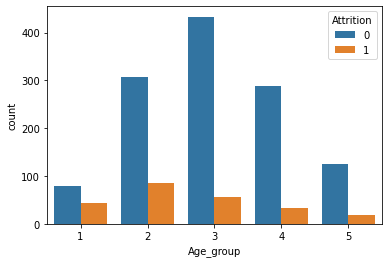

In [11]:
def Age(a):
    if a <= 25:
        return 1
    elif a > 25 and a <= 32:
        return 2
    elif a > 32 and a <= 40:
        return 3
    elif a > 40 and a <= 50:
        return 4
    else:
        return 5

df_company["Age_group"] = df_company["Age"].apply(lambda x: Age(x))
df_company["Age_group"].value_counts()
sns.countplot(x = "Age_group", hue = "Attrition", data = df_company)

''' 
Having a look at the plot which gives the relation between attrition and age group gives the insight that
the employees in the age group of under 25 tend to move faster and the ones within 25 and 32 also.
'''


' \nNow taking the relation between attrition and Distance from home gives the insight that \nthe employees with a farther distance from home tend to take a decision to attrite quite obviously.\n'

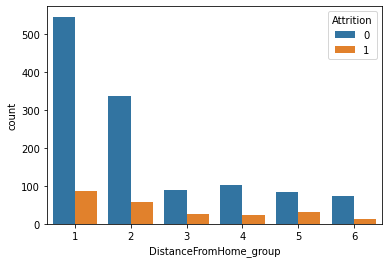

In [12]:
def DistanceFromHome(d):
    if d <= 5:
        return 1
    elif d > 5 and d <= 10:
        return 2
    elif d > 10 and d <= 15:
        return 3
    elif d > 15 and d <= 20:
        return 4
    elif d > 20 and d <= 25:
        return 5
    else:
        return 6
    
df_company["DistanceFromHome_group"] = df_company["DistanceFromHome"].apply(lambda x: DistanceFromHome(x))
df_company["DistanceFromHome_group"].value_counts()
sns.countplot(x = "DistanceFromHome_group", hue="Attrition", data = df_company)

''' 
Now taking the relation between attrition and Distance from home gives the insight that 
the employees with a farther distance from home tend to take a decision to attrite quite obviously.
'''

' \nNow this interesting fact is very well known that the one year atrrition employees are \nknown as Jumpers but this does go against their profile, and then the most attritions \ntake place in the range of 1 to 5 years of employment.\n'

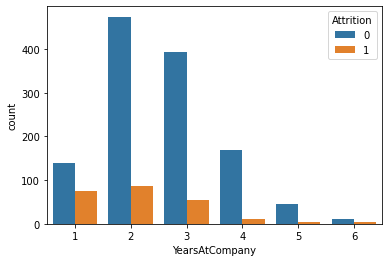

In [13]:
def YearsAtCompany(t):
    if t <= 1:
        return 1
    elif t > 1 and t <= 5:
        return 2
    elif t > 5 and t <= 10:
        return 3
    elif t > 10 and t <= 20:
        return 4
    elif t > 20 and t <= 30:
        return 5
    else:
        return 6

df_company["YearsAtCompany"] = df_company["YearsAtCompany"].apply(lambda x:YearsAtCompany(x))
df_company["YearsAtCompany"].value_counts()
sns.countplot(x = "YearsAtCompany", hue = "Attrition", data = df_company)

''' 
Now this interesting fact is very well known that the one year atrrition employees are 
known as Jumpers but this does go against their profile, and then the most attritions 
take place in the range of 1 to 5 years of employment.
'''


**Additionally we have to now normalize the data as the scale is not the same for all the variables. We will use minmax scaler for the job**

In [14]:
from sklearn.preprocessing import MinMaxScaler as mms
scale = mms() 
attrition_mms = pd.DataFrame(scale.fit_transform(attrition.iloc[:,:]))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:373: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_data.py:374: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [15]:
attrition_mms.columns = attrition.columns

In [16]:
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32,Age_group,DistanceFromHome_group
0,37,1,2,1,2,1,2,1,2,3,...,2,0,4,2,0,0,0,NaN,3,1
1,21,0,2,1,15,1,3,1,6,4,...,3,1,5,2,0,2,2,NaN,1,3
2,45,0,2,1,6,1,3,3,5,1,...,1,1,1,3,0,0,0,NaN,4,2
3,23,0,2,2,2,1,3,1,8,1,...,3,0,1,0,1,2,1,NaN,1,1
4,22,0,2,1,15,0,3,1,2,4,...,0,1,5,2,0,0,0,NaN,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,2,2,3,1,2,4,3,1,...,2,0,3,2,0,1,2,NaN,5,1
1466,55,0,2,1,1,1,3,5,3,1,...,3,1,1,1,0,3,1,NaN,5,1
1467,55,0,2,2,26,1,2,5,3,4,...,3,0,2,1,0,2,2,NaN,5,6
1468,58,0,2,2,10,1,3,4,7,3,...,4,1,2,2,1,0,2,NaN,5,2


In [17]:
attrition = attrition.drop(attrition.iloc[:, 30:31], axis = 1)

In [18]:
attrition

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Age_group,DistanceFromHome_group
0,37,1,2,1,2,1,2,1,2,3,...,1,2,0,4,2,0,0,0,3,1
1,21,0,2,1,15,1,3,1,6,4,...,1,3,1,5,2,0,2,2,1,3
2,45,0,2,1,6,1,3,3,5,1,...,3,1,1,1,3,0,0,0,4,2
3,23,0,2,2,2,1,3,1,8,1,...,2,3,0,1,0,1,2,1,1,1
4,22,0,2,1,15,0,3,1,2,4,...,2,0,1,5,2,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,52,0,2,2,3,1,2,4,3,1,...,3,2,0,3,2,0,1,2,5,1
1466,55,0,2,1,1,1,3,5,3,1,...,3,3,1,1,1,0,3,1,5,1
1467,55,0,2,2,26,1,2,5,3,4,...,3,3,0,2,1,0,2,2,5,6
1468,58,0,2,2,10,1,3,4,7,3,...,2,4,1,2,2,1,0,2,5,2


In [19]:
# We check the correlation of the various features
attrition_mms.corr() 

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,...,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,Unnamed: 32,Age_group,DistanceFromHome_group
Age,1.000000,-0.159205,0.024751,-0.031882,-0.001686,-0.036311,0.029820,0.509604,-0.122427,-0.004892,...,-0.015250,0.009323,0.033811,-0.004628,0.024869,0.008830,-0.030794,NaN,0.962428,0.008749
Attrition,-0.159205,1.000000,0.000074,0.063991,0.077924,0.029453,-0.130016,-0.169105,0.067151,-0.103481,...,0.020750,-0.006742,-0.041820,-0.037867,0.009846,0.004462,-0.055663,NaN,-0.164828,0.074065
BusinessTravel,0.024751,0.000074,1.000000,-0.009044,-0.024469,-0.032981,0.039062,0.019311,0.002724,-0.033962,...,0.029387,0.029590,-0.019584,-0.027932,0.051351,-0.024299,0.019918,NaN,0.017509,-0.025894
Department,-0.031882,0.063991,-0.009044,1.000000,0.017225,-0.041583,-0.024586,0.101963,0.662431,0.021001,...,-0.006956,0.010072,0.000139,-0.035409,-0.010932,-0.007854,0.028610,NaN,-0.039766,0.011131
DistanceFromHome,-0.001686,0.077924,-0.024469,0.017225,1.000000,-0.001851,0.008783,0.005303,-0.001015,-0.003669,...,0.003964,-0.029553,-0.022749,0.024581,-0.003409,-0.030024,-0.021048,NaN,0.000837,0.985209
Gender,-0.036311,0.029453,-0.032981,-0.041583,-0.001851,1.000000,0.017960,-0.039403,-0.039723,0.033252,...,0.014051,0.003336,-0.024768,-0.031885,-0.009442,-0.043518,-0.016212,NaN,-0.037117,-0.010878
JobInvolvement,0.029820,-0.130016,0.039062,-0.024586,0.008783,0.017960,1.000000,-0.012630,0.006616,-0.021476,...,0.023450,-0.045162,0.016599,-0.000442,0.000440,-0.001841,-0.003529,NaN,0.027500,0.007780
JobLevel,0.509604,-0.169105,0.019311,0.101963,0.005303,-0.039403,-0.012630,1.000000,-0.085457,-0.001944,...,-0.050779,-0.012443,0.028144,-0.013089,0.019751,-0.010084,-0.005571,NaN,0.484582,0.008043
JobRole,-0.122427,0.067151,0.002724,0.662431,-0.001015,-0.039723,0.006616,-0.085457,1.000000,0.017537,...,-0.005162,0.010442,-0.023574,-0.029712,-0.014673,0.023689,0.049110,NaN,-0.123595,-0.008711
JobSatisfaction,-0.004892,-0.103481,-0.033962,0.021001,-0.003669,0.033252,-0.021476,-0.001944,0.017537,1.000000,...,-0.034128,0.027742,-0.044989,-0.027244,-0.013293,-0.055882,-0.032944,NaN,-0.003037,-0.005841


In [20]:
attrition_mms = attrition_mms.drop(attrition_mms.iloc[:, 30:31], axis = 1)
corr_matrix = attrition_mms.corr() 
(corr_matrix['Attrition'].sort_values(ascending = False)) 

Attrition                  1.000000
OverTime                   0.246118
MaritalStatus              0.162070
DistanceFromHome           0.077924
DistanceFromHome_group     0.074065
JobRole                    0.067151
Department                 0.063991
NumCompaniesWorked         0.043494
Gender                     0.029453
Status_of_leaving          0.020750
Work_accident              0.009846
Source_of_Hire             0.004462
Higher_Education           0.003642
PerformanceRating          0.002889
BusinessTravel             0.000074
Mode_of_work              -0.006742
PercentSalaryHike         -0.013478
YearsSinceLastPromotion   -0.033019
Absenteeism               -0.037867
Leaves                    -0.041820
Job_mode                  -0.055663
TrainingTimesLastYear     -0.059478
JobSatisfaction           -0.103481
JobInvolvement            -0.130016
StockOptionLevel          -0.137145
YearsWithCurrManager      -0.156199
Age                       -0.159205
MonthlyIncome             -0

# We notice the correlation of various features and find that OverTime, Marital Status, DistanceFromHome and JobRole has the highest corelation with the Attririon

# > EDA - Exploratory Data Analysis

In [21]:
EDA = {"column": attrition_mms.columns,
       "mean": attrition_mms.mean(),
       "median": attrition_mms.median(),
       "mode": attrition_mms.mode(),
       "standard deviation": attrition_mms.std(),
       "variance": attrition_mms.var(),
       "skewness": attrition_mms.skew(),
       "kurtosis": attrition_mms.kurt()}


In [22]:
print(EDA)

{'column': Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Higher_Education',
       'Status_of_leaving', 'Mode_of_work', 'Leaves', 'Absenteeism',
       'Work_accident', 'Source_of_Hire', 'Job_mode', 'Age_group',
       'DistanceFromHome_group'],
      dtype='object'), 'mean': Age                        0.450567
Attrition                  0.161224
BusinessTravel             0.803741
Department                 0.630272
DistanceFromHome           0.292590
Gender                     0.600000
JobInvolvement             0.576644
JobLevel                   0.265986
JobRole                    0.557313
JobSatisfaction

# Now we try and visualise the factors that effect the attrtion most using the stacked plots as under.
# Not only does it give a better understanding but the visuals help select the features better.
# 

In [23]:
df_company = attrition_mms 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


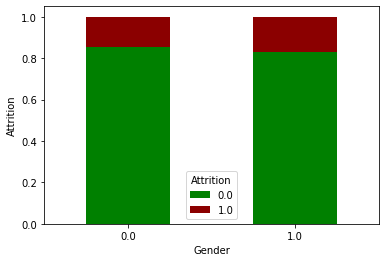

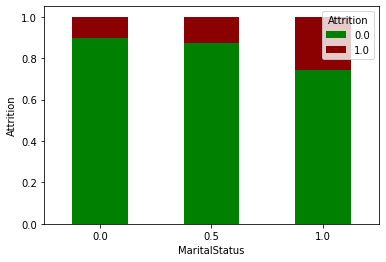

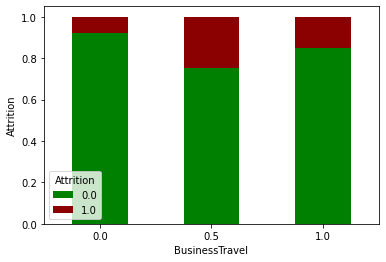

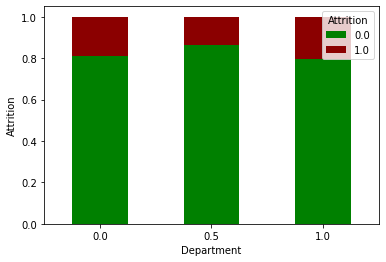

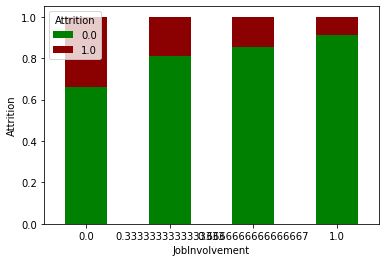

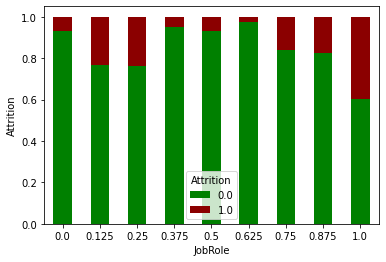

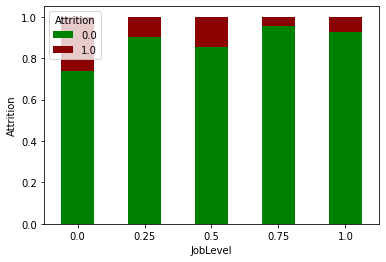

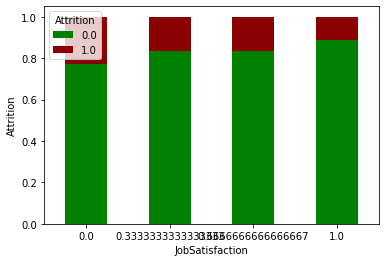

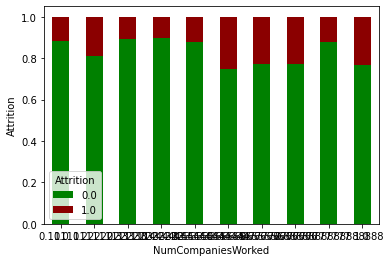

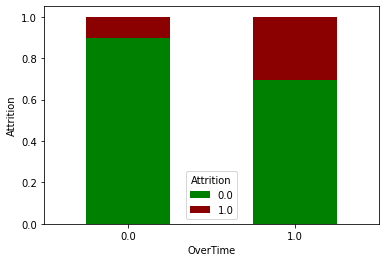

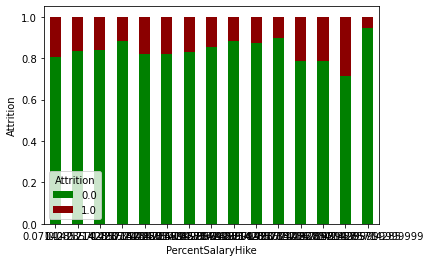

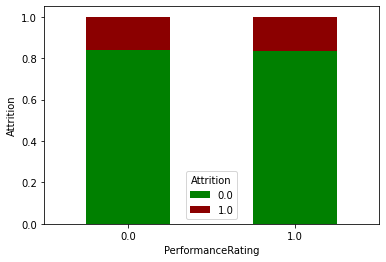

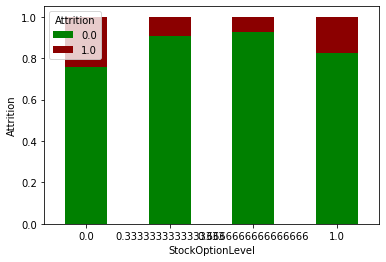

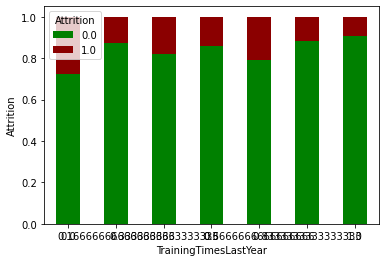

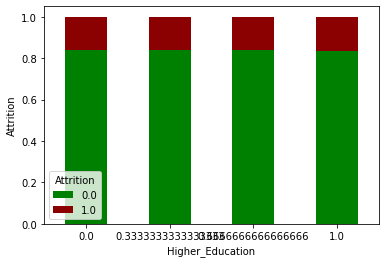

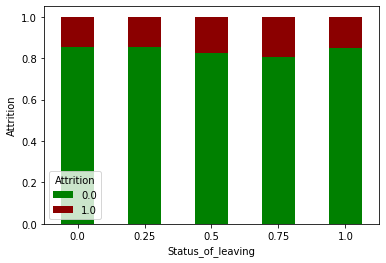

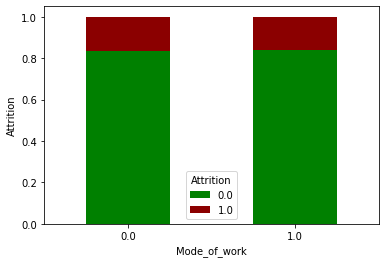

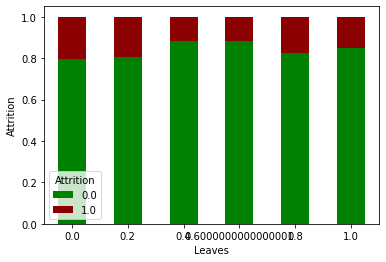

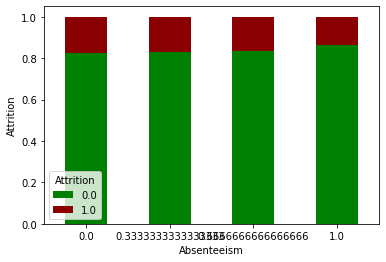

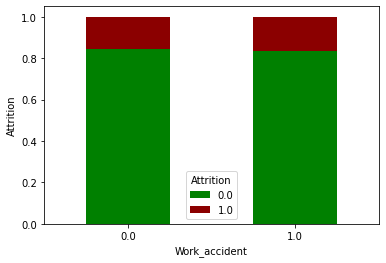

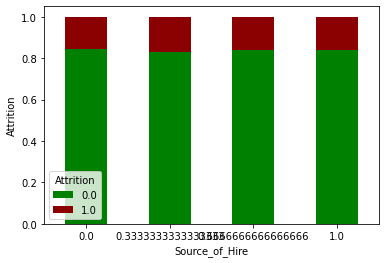

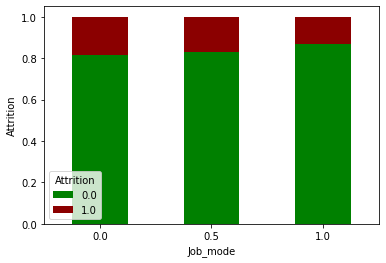

In [24]:
stacked_plot(df_company, "Gender", "Attrition")
stacked_plot(df_company, "MaritalStatus", "Attrition")
stacked_plot(df_company, "BusinessTravel", "Attrition")
stacked_plot(df_company, "Department", "Attrition")
stacked_plot(df_company, "JobInvolvement", "Attrition")
stacked_plot(df_company, "JobRole", "Attrition")
stacked_plot(df_company, "JobLevel", "Attrition")
stacked_plot(df_company, "JobSatisfaction", "Attrition")
stacked_plot(df_company, "NumCompaniesWorked", "Attrition")
stacked_plot(df_company, "OverTime", "Attrition")
stacked_plot(df_company, "PercentSalaryHike", "Attrition")
stacked_plot(df_company, "PerformanceRating", "Attrition")
stacked_plot(df_company, "StockOptionLevel", "Attrition")
stacked_plot(df_company, "TrainingTimesLastYear", "Attrition")
stacked_plot(df_company, "Higher_Education", "Attrition")
stacked_plot(df_company, "Status_of_leaving", "Attrition")
stacked_plot(df_company, "Mode_of_work", "Attrition")
stacked_plot(df_company, "Leaves", "Attrition")
stacked_plot(df_company, "Absenteeism", "Attrition")
stacked_plot(df_company, "Work_accident", "Attrition")
stacked_plot(df_company, "Source_of_Hire", "Attrition")
stacked_plot(df_company, "Job_mode", "Attrition")

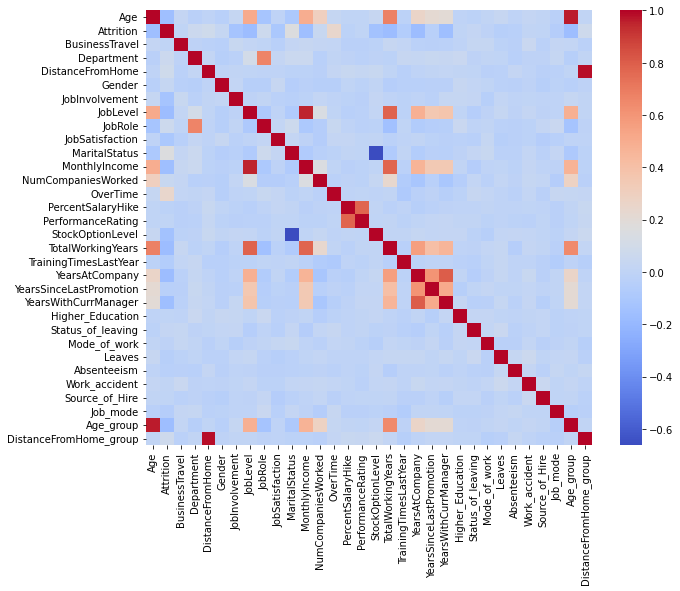

<AxesSubplot:>

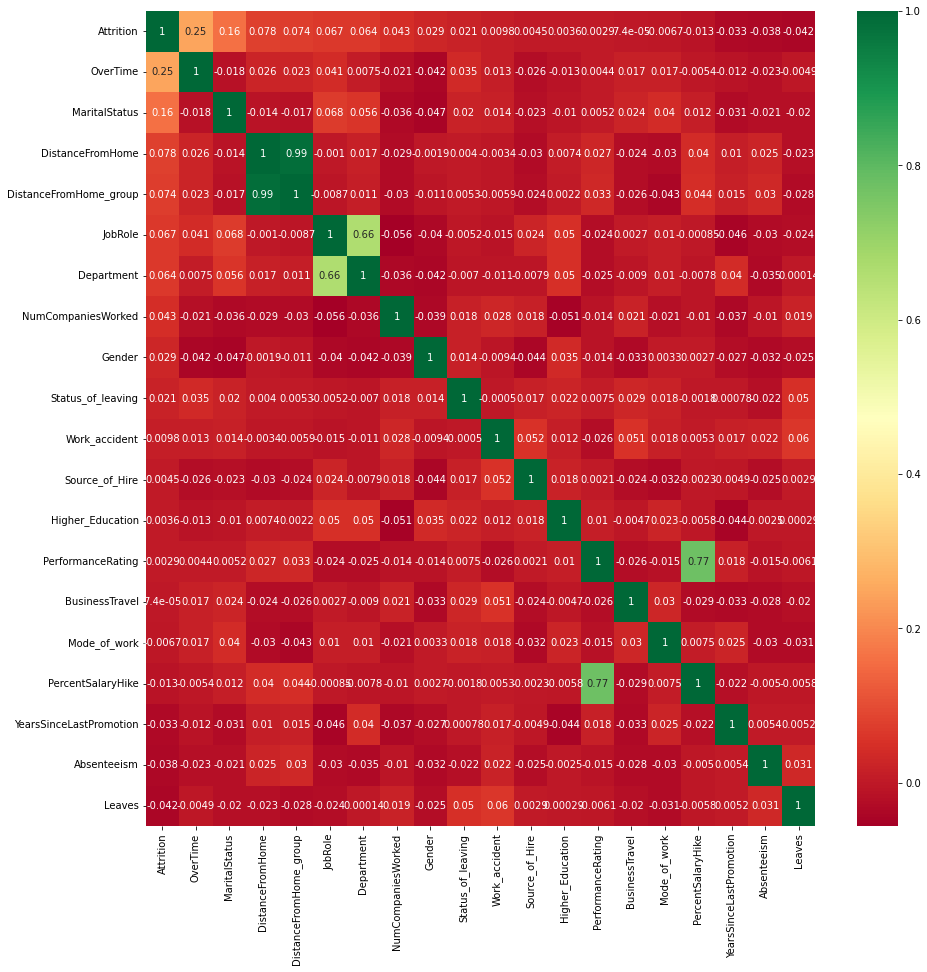

In [25]:
##############################################
# We plot the heat map to see the various relationships under correlation using the heatmap

plt.figure(figsize = (10,8))
sns.heatmap(df_company.corr(), annot = False, cmap = 'coolwarm')
plt.show()

# Checking the correlation coeficients and importance ordered
corr_attr = df_company.corr()
(corr_attr['Attrition'].sort_values(ascending = False))

col = df_company.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df_company[col].corr(), annot = True, cmap = "RdYlGn", annot_kws = {"size":10})


# We use now various features that are impactful on the attrition and try to check the survival analysis over them to determine the duration

In [26]:
!pip install lifelines
import lifelines

     |████████████████████████████████| 348 kB 278 kB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
  Created wheel for autograd: filename=autograd-1.3-py3-none-any.whl size=47989 sha256=2e2f2287ddcc56ef2a9e94dc86e908955cd07e855f6ac2fb410e60d50b740272
  Stored in directory: /root/.cache/pip/wheels/ef/32/31/0e87227cd0ca1d99ad51fbe4b54c6fa02afccf7e483d045e04
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=8e59e7a33098756194bc0fe01d88846ceb8c632706a7801e7c02874ede8fdf4c
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd autograd-gamma


In [27]:
df = pd.read_csv("../input/hr-attrition-dataset/Final dataset Attrition.csv")

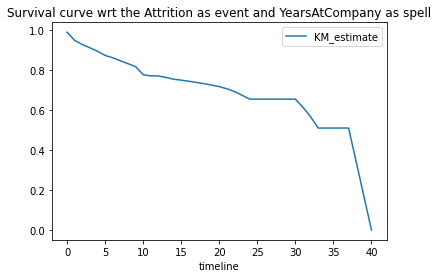

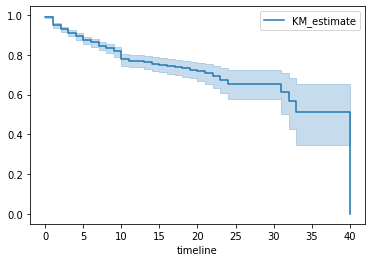

In [28]:
# Taking "YearsAtCompany" to be time spell
T = df.YearsAtCompany 

# Importing the KaplanMeierFitter model to fit the survival analysis
from lifelines import KaplanMeierFitter
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()
# Fitting KaplanMeierFitter model on Time and Events for Attrition
kmf.fit(durations = T, event_observed = df_company.Attrition)
# Time-line estimations plot 
kmf.survival_function_.plot()
plt.title('Survival curve wrt the Attrition as event and YearsAtCompany as spell')
plt.show()

# Print survival probabilities at each year
kmf.survival_function_

# Plot the survival function with confidence intervals
kmf.plot_survival_function()
plt.show()

Text(0.5, 1.0, 'Survival plot for "Attrition" w.r.t "OverTime"')

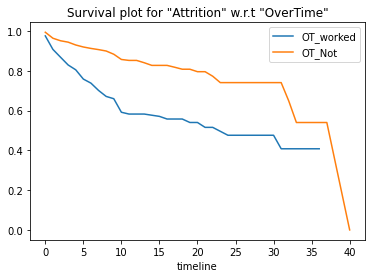

In [29]:
##############################################
# We try over Multiple groups with the event being "Attrition"
''' We first select the group to be OverTime'''
df_company.OverTime.value_counts()

OT_worked = df_company.OverTime == 1
OT_Not = df_company.OverTime == 0
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[df_company.OverTime == 1], df_company.Attrition[df_company.OverTime == 1], label = 'OT_worked')
ax = kmf.survival_function_.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[df_company.OverTime == 0], df_company.Attrition[df_company.OverTime == 0], label = 'OT_Not')
kmf.survival_function_.plot(ax=ax)
plt.title('Survival plot for "Attrition" w.r.t "OverTime"')


Text(0.5, 1.0, 'Survival plot for "Attrition" w.r.t "BusinessTravel"')

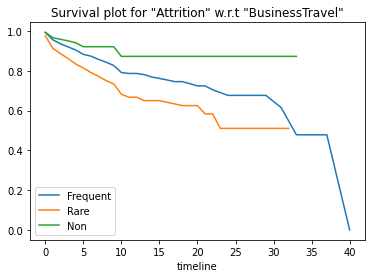

In [30]:
##############################################
''' We now select the group to be BusinessTravel'''
df_company.BusinessTravel.value_counts()

Frequent = df_company.BusinessTravel == 1.00
Rare = df_company.BusinessTravel == 0.50
Non = df_company.BusinessTravel == 0.00
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[df_company.BusinessTravel == 1], df_company.Attrition[df_company.BusinessTravel == 1], label = 'Frequent')
ax = kmf.survival_function_.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0.5"
kmf.fit(T[df_company.BusinessTravel == 0.5], df_company.Attrition[df_company.BusinessTravel == 0.5], label = 'Rare')
kmf.survival_function_.plot(ax=ax)

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[df_company.BusinessTravel == 0], df_company.Attrition[df_company.BusinessTravel == 0], label = 'Non')
kmf.survival_function_.plot(ax=ax)
plt.title('Survival plot for "Attrition" w.r.t "BusinessTravel"')


Text(0.5, 1.0, 'Survival plot for "Attrition" w.r.t "JobLevel"')

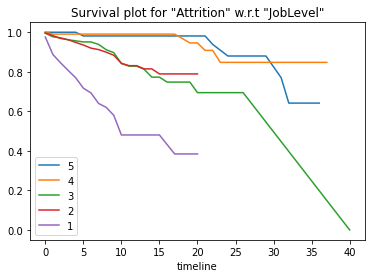

In [31]:
##############################################
''' We now select the group to be JobLevel'''
df_company.JobLevel.value_counts()


# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[df_company.JobLevel == 1], df_company.Attrition[df_company.JobLevel == 1], label = '5')
ax = kmf.survival_function_.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0.75"
kmf.fit(T[df_company.JobLevel == 0.75], df_company.Attrition[df_company.JobLevel == 0.75], label = '4')
kmf.survival_function_.plot(ax=ax)

# Applying KaplanMeierFitter model on Time and Events for the group "0.50"
kmf.fit(T[df_company.JobLevel == 0.50], df_company.Attrition[df_company.JobLevel == 0.50], label = '3')
kmf.survival_function_.plot(ax=ax)

# Applying KaplanMeierFitter model on Time and Events for the group "0.25"
kmf.fit(T[df_company.JobLevel == 0.25], df_company.Attrition[df_company.JobLevel == 0.25], label = '2')
kmf.survival_function_.plot(ax=ax)

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[df_company.JobLevel == 0], df_company.Attrition[df_company.JobLevel == 0], label = '1')
kmf.survival_function_.plot(ax=ax)
plt.title('Survival plot for "Attrition" w.r.t "JobLevel"')

Text(0.5, 1.0, 'Survival plot for "Attrition" w.r.t "Age_group"')

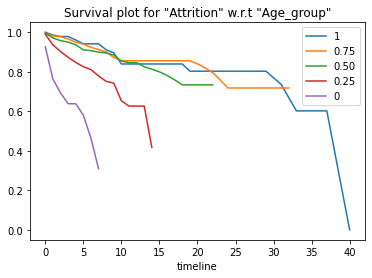

In [32]:
##############################################
''' We now select the group to be Age_group'''
df_company.Age_group.value_counts()

# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[df_company.Age_group == 1], df_company.Attrition[df_company.Age_group == 1], label = '1')
ax = kmf.survival_function_.plot() 

# Applying KaplanMeierFitter model on Time and Events for the group "0.75"
kmf.fit(T[df_company.Age_group == 0.75], df_company.Attrition[df_company.Age_group == 0.75], label = '0.75')
kmf.survival_function_.plot(ax=ax) 

# Applying KaplanMeierFitter model on Time and Events for the group "0.50"
kmf.fit(T[df_company.Age_group == 0.50], df_company.Attrition[df_company.Age_group == 0.50], label = '0.50')
kmf.survival_function_.plot(ax=ax) 

# Applying KaplanMeierFitter model on Time and Events for the group "0.25"
kmf.fit(T[df_company.Age_group == 0.25], df_company.Attrition[df_company.Age_group == 0.25], label = '0.25')
kmf.survival_function_.plot(ax=ax) 

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[df_company.Age_group == 0], df_company.Attrition[df_company.Age_group == 0], label = '0')
kmf.survival_function_.plot(ax=ax) 
plt.title('Survival plot for "Attrition" w.r.t "Age_group"') 

# Splitting the Data and Building the Model

In [33]:
#######################################################
'''
We start building the models for classification
We start by splitting the data into Train and test
'''
#######################################################

from sklearn.model_selection import train_test_split
df = df_company.iloc[:, 1]
df1 = df_company.drop('Attrition', axis = 1)
X = df1
Y = df

In [34]:
# herein we split the data with test size kept as 15%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 40)
print(y_train.value_counts())
print(y_test.value_counts())

0.0    1041
1.0     208
Name: Attrition, dtype: int64
0.0    192
1.0     29
Name: Attrition, dtype: int64


# Let us import the various libraries to build the models

In [35]:
# We start building the models using the following regression models for classifying
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Logistic Regression

In [36]:
'''Logistic Regression'''
log = LogisticRegression() 


In [37]:
x_test = x_test.drop(x_test.iloc[:, 29:30], axis = 1)
x_test

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,DistanceFromHome_group
1456,0.761905,0.0,0.5,0.035714,1.0,0.666667,0.75,0.375,0.000000,0.0,...,0.411765,0.333333,0.25,1.0,0.8,0.666667,0.0,0.000000,0.5,0.0
236,0.357143,1.0,0.5,0.142857,0.0,0.333333,0.00,0.750,1.000000,0.5,...,0.117647,1.000000,0.00,1.0,0.8,0.666667,1.0,0.666667,1.0,0.0
70,0.023810,1.0,0.5,0.035714,1.0,0.333333,0.00,0.250,1.000000,1.0,...,0.000000,1.000000,1.00,0.0,0.0,0.333333,0.0,0.333333,0.0,0.0
42,0.904762,1.0,1.0,0.357143,0.0,0.333333,0.25,0.875,0.000000,0.5,...,0.000000,0.666667,0.00,0.0,1.0,0.000000,1.0,0.666667,0.0,0.4
454,0.119048,1.0,1.0,0.214286,1.0,0.666667,0.00,1.000,1.000000,0.0,...,0.117647,0.333333,0.00,1.0,1.0,1.000000,0.0,0.333333,0.5,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,0.285714,1.0,0.5,0.000000,1.0,0.666667,0.00,0.250,0.333333,0.5,...,0.411765,0.333333,0.25,1.0,0.4,0.333333,0.0,0.666667,0.5,0.0
348,0.976190,0.0,0.0,0.035714,0.0,0.333333,1.00,0.375,1.000000,0.5,...,0.117647,0.000000,0.25,0.0,0.8,0.666667,0.0,0.333333,1.0,0.0
726,0.690476,1.0,0.0,0.892857,0.0,0.666667,1.00,0.375,0.666667,0.5,...,0.000000,0.333333,1.00,1.0,1.0,0.333333,0.0,0.666667,1.0,1.0
1209,0.428571,1.0,1.0,0.321429,0.0,0.333333,0.25,0.875,0.666667,0.5,...,0.411765,1.000000,1.00,1.0,0.8,0.333333,1.0,1.000000,1.0,0.2


In [38]:
x_train = x_train.drop(x_train.iloc[:, 29:30], axis = 1)
x_train

,Age,BusinessTravel,Department,DistanceFromHome,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,...,YearsWithCurrManager,Higher_Education,Status_of_leaving,Mode_of_work,Leaves,Absenteeism,Work_accident,Source_of_Hire,Job_mode,DistanceFromHome_group
776,0.547619,1.0,1.0,0.000000,0.0,0.666667,0.25,0.875,1.000000,1.0,...,0.294118,1.000000,0.50,1.0,0.0,0.000000,0.0,0.333333,0.0,0.0
281,0.357143,0.0,1.0,0.250000,0.0,0.333333,0.00,1.000,1.000000,1.0,...,0.117647,1.000000,1.00,0.0,1.0,1.000000,1.0,0.666667,1.0,0.2
435,0.309524,1.0,0.0,0.250000,0.0,1.000000,0.00,0.125,0.333333,1.0,...,0.117647,0.333333,0.75,1.0,1.0,1.000000,1.0,0.333333,1.0,0.2
1267,0.309524,1.0,1.0,1.000000,0.0,0.333333,0.25,0.875,1.000000,0.5,...,0.411765,0.000000,0.75,0.0,0.4,0.000000,0.0,1.000000,0.5,1.0
323,0.666667,0.0,1.0,0.892857,1.0,0.333333,0.25,0.875,0.333333,1.0,...,0.117647,0.333333,0.25,0.0,1.0,0.000000,0.0,0.333333,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,0.666667,1.0,1.0,0.321429,0.0,0.666667,0.50,0.875,0.333333,0.5,...,0.411765,1.000000,0.50,0.0,1.0,0.000000,1.0,1.000000,1.0,0.2
165,0.214286,1.0,1.0,0.357143,0.0,1.000000,0.00,1.000,1.000000,0.5,...,0.000000,1.000000,0.75,0.0,0.4,0.333333,1.0,0.333333,0.0,0.4
7,0.238095,1.0,0.5,0.035714,1.0,0.666667,0.00,0.250,0.666667,1.0,...,0.000000,1.000000,1.00,1.0,0.0,0.666667,0.0,1.000000,0.0,0.0
219,0.404762,1.0,1.0,0.035714,0.0,0.666667,0.00,1.000,1.000000,0.5,...,0.117647,0.000000,0.50,0.0,0.2,0.333333,0.0,0.000000,0.5,0.0


Train Set Accuracy:87.02962369895917
Test Set Accuracy:88.23529411764706


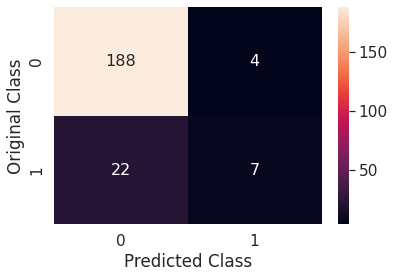

In [39]:
log.fit(x_train, y_train)
log_acc = accuracy_score(y_test, log.predict(x_test)) 
print("Train Set Accuracy:"+str(accuracy_score(y_train, log.predict(x_train))*100)) 
print("Test Set Accuracy:"+str(accuracy_score(y_test, log.predict(x_test))*100)) 

plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, log.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Decision Tree

Train test Accuracy:100.0
Test Set Accuracy:80.99547511312217


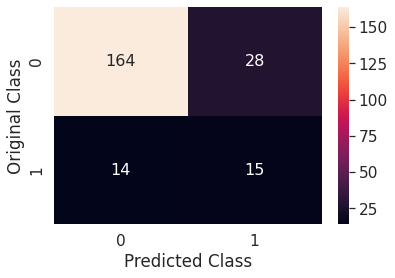

In [40]:
'''Descision Tree'''
dec = DecisionTreeClassifier()
dec.fit(x_train, y_train)

dec_acc = accuracy_score(y_test, dec.predict(x_test))
print("Train test Accuracy:"+str(accuracy_score(y_train, dec.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test, dec.predict(x_test))*100))

plt.figure(figsize = (6,4)) 
df_ = pd.DataFrame(confusion_matrix(y_test, dec.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


# Random Forest

Train Set Accuracy:100.0
Test Set Accuracy:89.14027149321268


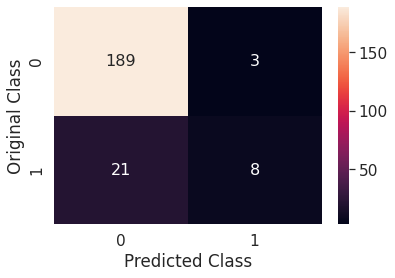

In [41]:
"""**Random Forest**"""

r_for = RandomForestClassifier()
r_for.fit(x_train,y_train)

r_acc=accuracy_score(y_test,r_for.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,r_for.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,r_for.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, r_for.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


# KNN - K Nearest Neighbours

Train set Accuracy:86.70936749399519
Test Set Accuracy:85.06787330316742


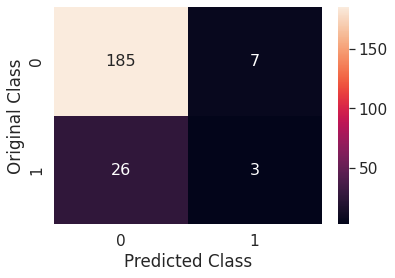

In [42]:
"""**K-NN**
"""

k_nei = KNeighborsClassifier()
k_nei.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_nei.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,k_nei.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,k_nei.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, k_nei.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# SVC

Train set Accuracy:87.26981585268214
Test Set Accuracy:86.87782805429865


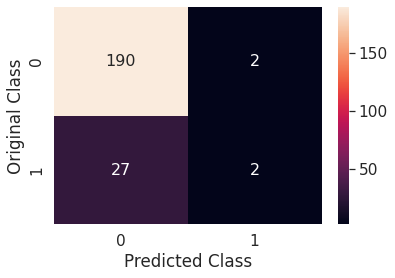

In [43]:

"""**SVC**"""

s_vec = SVC()
s_vec.fit(x_train,y_train)

s_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,s_vec.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,s_vec.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, s_vec.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

# Gaussian Naive Bayes

Train set Accuracy:81.50520416333067
Test Set Accuracy:79.18552036199095


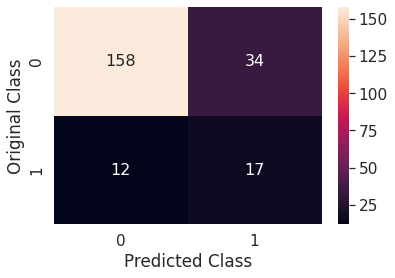

In [44]:
g_clf = GaussianNB()
g_clf.fit(x_train,y_train)

g_acc = accuracy_score(y_test,g_clf.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,g_clf.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,g_clf.predict(x_test))*100))

plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, g_clf.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()


# Comparing the models and checking the best accuracy result off the lot

In [45]:
models = pd.DataFrame({'Model': ['Logistic', 'KNN', 'SVC', 'Decision Tree Classifier',
                       'Random Forest Classifier', 'Gaussian'],
                       'Accuracy': [ log_acc,k_acc, s_acc, dec_acc, r_acc, g_acc]})

models.sort_values(by = 'Accuracy', ascending = False) 

,Model,Accuracy
4,Random Forest Classifier,0.891403
0,Logistic,0.882353
2,SVC,0.868778
1,KNN,0.850679
3,Decision Tree Classifier,0.809955
5,Gaussian,0.791855


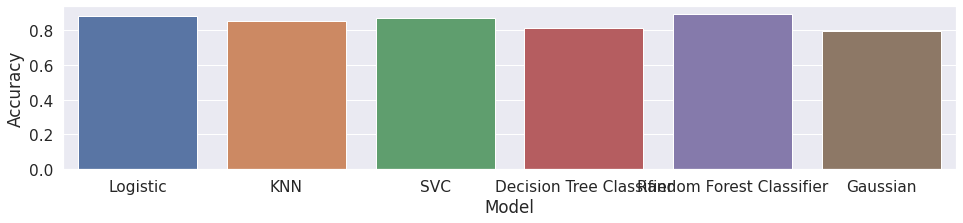

'We notice here that Logistic Regression is giving us the best accuracy result\n so ,we will go with the Logistic Regression model'

In [46]:
plt.figure(figsize = (16,3))
sns.barplot(x = 'Model', y = 'Accuracy', data = models)
plt.show()

"""We notice here that Logistic Regression is giving us the best accuracy result
 so ,we will go with the Logistic Regression model"""



# We note that Random Forest Classifier gives the best result